<a href="https://colab.research.google.com/github/souparnabose99/moore-regression-tf/blob/main/Moore's_Law_Reg_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.5.0'

### Load Dataset:

In [2]:
!wget https://raw.githubusercontent.com/souparnabose99/moore-regression-tf/main/moore.csv

--2021-06-29 07:18:11--  https://raw.githubusercontent.com/souparnabose99/moore-regression-tf/main/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2464 (2.4K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.41K  --.-KB/s    in 0s      

2021-06-29 07:18:11 (44.5 MB/s) - ‘moore.csv’ saved [2464/2464]



In [5]:
data =pd.read_csv('moore.csv', header=None).values

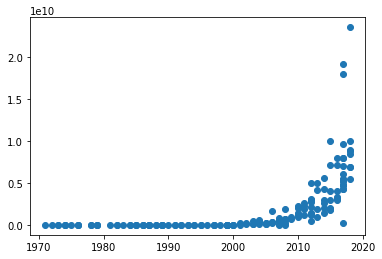

In [6]:
X = data[:,0].reshape(-1,1) #2-D array of size N x D where D =1
y = data[:,1]

plt.scatter(X, y)

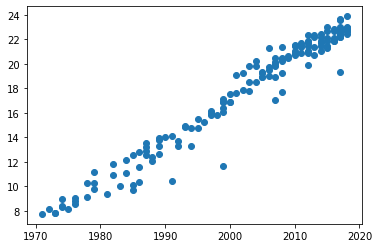

In [7]:
y = np.log(y)
plt.scatter(X, y)

### Center the data:

In [8]:
X[0]

array([1971])

In [9]:
X = X - X.mean()
X[0]

array([-31.19753086])

### Create Model:

In [12]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Input(shape=(1,)),
     tf.keras.layers.Dense(1)
    ]
)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mse')

### Schedule learning rate:

In [15]:
def schedule_lr(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule_lr)

### Train Model:

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
training = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 444.9987
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 315.1925
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 269.1281
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 231.7736
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 178.7810
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 118.1800
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 160.0113
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 102.4586
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 78.1125
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 44.8029
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 33.6948
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 21.8102
Epoch 13/200
6/6 [=======================

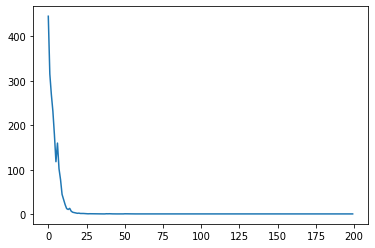

In [17]:
plt.plot(training.history['loss'], label='loss')

In [19]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3406097]], dtype=float32), array([17.770336], dtype=float32)]


In [21]:
a = model.layers[0].get_weights()[0][0,0]
a

0.3406097

Original Equation for Moore's Law:
* C = A(r^t), where C= transistor count and t= years, r= rate of growth
* When t cahnges from 1-2 or 2-3.., C increases by a factor of r
* Taking log, we have: log(C) = log(r*t) + log(A), similar to y= ax + b
* y = log(C), a = log(r), x=t, b= log(A)
* a = 0.34, therefore r = 1.4076, we need to find time for C to become 2C
* t` - t = log2/a

In [22]:
print("Time for doubling is : ", np.log(2)/a)  

Time for doubling is :  2.0350189134440786
